In [1]:
from chesslab.agent_tf import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
class Model_1():

    def __init__(self,
                   n_classes=2):
        initializer = tf.keras.initializers.GlorotNormal()
        self.hw=[]
        self.hb=[]

        self.hw.append( tf.Variable(initializer(shape=(7,7,3,32),dtype=np.float32),name="hl1weigths",dtype="float32") )
        self.hb.append( tf.Variable(np.zeros(32,dtype=np.float32),name="hl1bias",dtype="float32") )
        #8x8x32
        self.hw.append( tf.Variable(initializer(shape=(5,5,32,64),dtype=np.float32),name="hl2weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(64,dtype=np.float32),name="hl2bias",dtype="float32"))
        #8x8x64
        self.hw.append( tf.Variable(initializer(shape=(3,3,64,128),dtype=np.float32),name="hl3weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(128,dtype=np.float32),name="hl3bias",dtype="float32"))
        #8x8x128
        self.hw.append( tf.Variable(initializer(shape=(8*8*128,256),dtype=np.float32),name="hl4weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(256,dtype=np.float32),name="hl4bias",dtype="float32"))

        self.hw.append( tf.Variable(initializer(shape=(256, n_classes),dtype=np.float32),name="outweigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(n_classes,dtype=np.float32),name="outbias",dtype="float32"))

        self.trainable_variables = []
        for i in range(len(self.hw)):
            self.trainable_variables.append(self.hw[i])    
            self.trainable_variables.append(self.hb[i])

    def __call__(self,x): 

        # Declarando la arquitectura
        out = tf.cast(x, tf.float32)
        out = tf.reshape(out, shape=[-1, 8, 8, 3])

        layer=0
        out = tf.add(out, 1e-8)
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*32
        layer+=1
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*64
        layer+=1  
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*128
        layer+=1
        out =  tf.reshape(out,[-1, 8*8*128])
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)

        layer+=1
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])

        return out
model = Model_1()

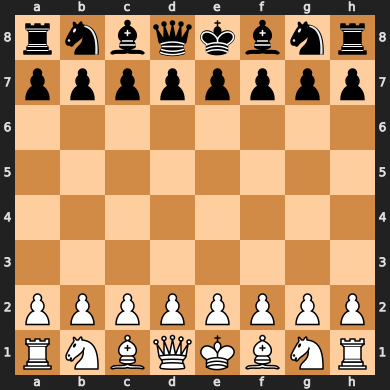

In [3]:
board=chess.Board()
board

In [4]:
base_name = './tmp/tf_weights.0.{}.h5'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Move.from_uci('d2d4')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.58648854, 0.6119786 , 0.61188215, 0.54656625, 0.61422926,
       0.5714121 , 0.5821004 , 0.53464544, 0.53655094, 0.5463779 ,
       0.56000334, 0.6158736 , 0.60025996, 0.611892  , 0.5981375 ,
       0.63867223, 0.6396382 , 0.6208198 , 0.5934759 , 0.6303148 ],
      dtype=float32)

In [8]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('d2d4'), 0.6396381855010986],
       [Move.from_uci('e2e4'), 0.6386722326278687],
       [Move.from_uci('a2a4'), 0.630314826965332],
       [Move.from_uci('c2c4'), 0.6208198070526123],
       [Move.from_uci('a2a3'), 0.6158735752105713],
       [Move.from_uci('h2h3'), 0.6142292618751526],
       [Move.from_uci('g1f3'), 0.6119785904884338],
       [Move.from_uci('g2g4'), 0.6118919849395752],
       [Move.from_uci('b1c3'), 0.6118821501731873],
       [Move.from_uci('h2h4'), 0.6002599596977234],
       [Move.from_uci('f2f4'), 0.5981374979019165],
       [Move.from_uci('b2b4'), 0.593475878238678],
       [Move.from_uci('g1h3'), 0.5864885449409485],
       [Move.from_uci('f2f3'), 0.5821003913879395],
       [Move.from_uci('g2g3'), 0.5714120864868164],
       [Move.from_uci('b2b3'), 0.5600033402442932],
       [Move.from_uci('b1a3'), 0.5465662479400635],
       [Move.from_uci('c2c3'), 0.5463778972625732],
       [Move.from_uci('d2d3'), 0.5365509390830994],
       [Move.f

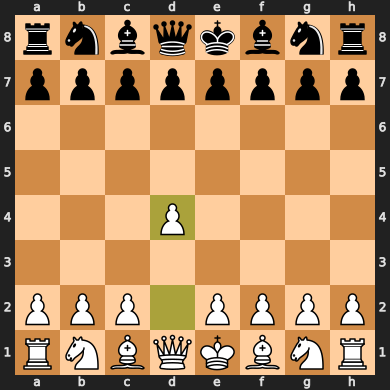

In [9]:
board.push(move)
board

In [10]:
kaufman_test(deepbot)

0.12

In [11]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 3/25 = 0.12 | weighted = 0.7
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 9 & 48 & 0.8298 & 0.6358 & c1c7 & 0.7656  \\
02 & f5d4 & 25 & 39 & 0.3684 & 0.2761 & d7d4 & 0.4780  \\
03 & e1d1 & 20 & 38 & 0.4865 & 0.5716 & f2c5 & 0.8563  \\
04 & b1b2 & 6 & 47 & 0.8913 & 0.8098 & d2f4 & 0.8289  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.5835 & c8c3 & 0.7382  \\
06 & a3a2 & 8 & 31 & 0.7667 & 0.4446 & h7h6 & 0.5088  \\
07 & b7e4 & 7 & 33 & 0.8125 & 0.3928 & c7c4 & 0.4350  \\
08 & h7h6 & 12 & 39 & 0.7105 & 0.4571 & f8f2 & 0.6479  \\
09 & f3e2 & 19 & 35 & 0.4706 & 0.5016 & h1f1 & 0.6226  \\
10 & d5c3 & 18 & 41 & 0.5750 & 0.4865 & c7c3 & 0.6563  \\
11 & g3f5 & 5 & 35 & 0.8824 & 0.9211 & c4c5 & 0.9264  \\
12 & c6d6 & 38 & 41 & 0.0750 & 0.2169 & e7e3 & 0.5342  \\
13 & c3d5 & 2 & 30 & 0.9655 & 0.7419 & f1f6 & 0.8690  \\
14 & b1b2 & 21 & 49 & 0.5833 & 0.6196 & d3g6 & 0.7547  \\
15 & d3f5 & 13 & 51 & 0.7600 & 0.7005 & e1e6 & 0.8149  \\
16 & b3b4 & 2 & 10 & 0.8889 & 0.5384 & 

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.635808,c1c7,0.765553,9,48,0.829787
1,f5d4,0.276123,d7d4,0.478017,25,39,0.368421
2,e1d1,0.571631,f2c5,0.856338,20,38,0.486486
3,b1b2,0.809768,d2f4,0.828851,6,47,0.891304
4,g5c1,0.583479,c8c3,0.738199,2,48,0.978723
5,a3a2,0.444583,h7h6,0.508815,8,31,0.766667
6,b7e4,0.392817,c7c4,0.435027,7,33,0.812500
7,h7h6,0.457087,f8f2,0.647924,12,39,0.710526
8,f3e2,0.501645,h1f1,0.622590,19,35,0.470588
9,d5c3,0.486459,c7c3,0.656334,18,41,0.575000


In [12]:
epochs=30
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
train_acc_model = np.zeros(epochs)
test_acc_model = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,_  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
    train_acc_model[i-1] = deepbot.history['train']['acc']
    test_acc_model[i-1] = deepbot.history['test']['acc']


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GP

In [13]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,30)
ssp = np.repeat(ssp,30)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.24 | 0.61


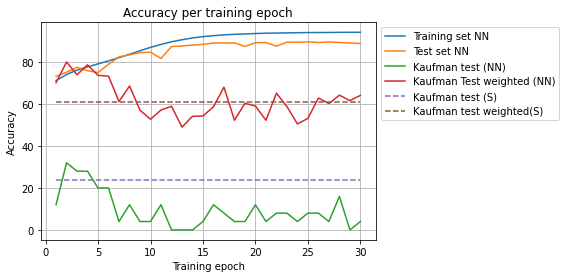

In [14]:
x = np.arange(30)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dashed')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Accuracy per training epoch')
plt.xlabel('Training epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set NN','Test set NN','Kaufman test (NN)','Kaufman Test weighted (NN)','Kaufman test (S)','Kaufman test weighted(S)'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [15]:
train_acc_model

array([0.71180391, 0.74107659, 0.76191324, 0.77742457, 0.79158419,
       0.80588502, 0.82133955, 0.83745438, 0.85436028, 0.87014633,
       0.88441384, 0.8968913 , 0.90676653, 0.91532171, 0.92157197,
       0.92605859, 0.93003815, 0.9326123 , 0.93443298, 0.9364062 ,
       0.93790287, 0.93870378, 0.93934941, 0.94023061, 0.94102001,
       0.94114912, 0.94139415, 0.94203448, 0.94212651, 0.94246471])

In [16]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(30):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 71.18 & 73.22 & 12.00 & 70.20 \\
02 & 74.11 & 75.21 & 32.00 & 80.05 \\
03 & 76.19 & 77.55 & 28.00 & 73.99 \\
04 & 77.74 & 75.91 & 28.00 & 78.70 \\
05 & 79.16 & 75.05 & 20.00 & 73.68 \\
06 & 80.59 & 78.94 & 20.00 & 73.31 \\
07 & 82.13 & 82.51 & 4.00 & 61.19 \\
08 & 83.75 & 83.46 & 12.00 & 68.63 \\
09 & 85.44 & 84.53 & 4.00 & 57.08 \\
10 & 87.01 & 84.76 & 4.00 & 52.76 \\
11 & 88.44 & 81.76 & 12.00 & 57.17 \\
12 & 89.69 & 87.44 & 0.00 & 58.95 \\
13 & 90.68 & 87.69 & 0.00 & 49.01 \\
14 & 91.53 & 88.13 & 0.00 & 54.16 \\
15 & 92.16 & 88.44 & 4.00 & 54.28 \\
16 & 92.61 & 89.14 & 12.00 & 58.74 \\
17 & 93.00 & 89.12 & 8.00 & 68.05 \\
18 & 93.26 & 89.17 & 4.00 & 52.30 \\
19 & 93.44 & 87.48 & 4.00 & 60.36 \\
20 & 93.64 & 89.29 & 12.00 & 59.08 \\
21 & 93.79 & 89.33 & 4.00 & 52.28 \\
22 & 93.87 & 87.61 & 8.00 & 65.21 \\
23 & 93.93 & 89.52 & 8.00 & 58.80 \\
24 & 94.02 & 89.50 

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.711804,0.732216,0.12,0.702047
2,0.741077,0.752125,0.32,0.800499
3,0.761913,0.775541,0.28,0.739854
4,0.777425,0.759134,0.28,0.786956
5,0.791584,0.750495,0.20,0.736840
6,0.805885,0.789427,0.20,0.733060
7,0.821340,0.825102,0.04,0.611866
8,0.837454,0.834605,0.12,0.686283
9,0.854360,0.845321,0.04,0.570765
10,0.870146,0.847582,0.04,0.527607
